# Count and calculate the exact proportion of  “Knapsack solutions.” for the problem in the image,

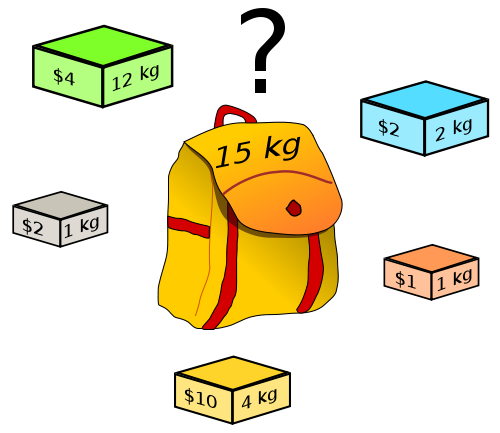

In [1]:
from itertools import permutations
from itertools import combinations
cost = [1, 2, 2, 4, 10]
weight = [1, 1, 2, 12, 4]
#key = weight value = cost
dictionary = {1 : [1, 2], 2: [2], 12: [4], 4: [10]}
goal = 15
n = len(cost)

comb =[]
# Generate the combinations
for i in range(1, n+1):
  comb.append(list(combinations(weight, i)))

# Number of combinations
total_combinations = 0 
total_solutions = 0
solutions = []
for i in list(comb):
  for element in i:
    total_combinations +=1
    if sum(element) <= goal:
      total_solutions += 1
      solutions.append(element)

values = []
for element in solutions:
  value = 0
  for i in element:
    if i in dictionary:
      value += min(dictionary.get(i))
  values.append(value)
print("N° Combinations: ", total_combinations)
print("N° Solutions: ", total_solutions)
print("Proportion: ", total_solutions / total_combinations)
print("Solutions: \n")
counter = 0
print("Number\tSolution\tValue")
for solution in solutions:
  print(counter+1,"\t", solution,"\t", values[counter])
  counter += 1


N° Combinations:  31
N° Solutions:  22
Proportion:  0.7096774193548387
Solutions: 

Number	Solution	Value
1 	 (1,) 	 1
2 	 (1,) 	 1
3 	 (2,) 	 2
4 	 (12,) 	 4
5 	 (4,) 	 10
6 	 (1, 1) 	 2
7 	 (1, 2) 	 3
8 	 (1, 12) 	 5
9 	 (1, 4) 	 11
10 	 (1, 2) 	 3
11 	 (1, 12) 	 5
12 	 (1, 4) 	 11
13 	 (2, 12) 	 6
14 	 (2, 4) 	 12
15 	 (1, 1, 2) 	 4
16 	 (1, 1, 12) 	 6
17 	 (1, 1, 4) 	 12
18 	 (1, 2, 12) 	 7
19 	 (1, 2, 4) 	 13
20 	 (1, 2, 12) 	 7
21 	 (1, 2, 4) 	 13
22 	 (1, 1, 2, 4) 	 14


# Estimate the proportion and number of “Knapsack solutions.” if the sizes are (1,2,3,4,5,6,7,9,10) and the capacity of the knapsack is 10 using Mote Carlo with 1.000, 10.000 random binary vectors, 

In [2]:
import numpy as np
import pandas as pd

def simulation(runs, weight, goal):
  n = len(weight)

  total_solutions = 0
  solutions = []
  for i in range(runs):
    rand_vector = np.random.randint(0,2,n)
    rand_combination = np.multiply(weight, rand_vector)
    if np.sum(rand_combination) <= goal:
      total_solutions += 1
      solutions.append(rand_combination)

  proportion = (total_solutions / runs)*100
  print("N° runs:\t", runs)
  print("N° Solutions:\t", total_solutions)
  print("Proportion: \t", proportion,"%")
  print("First 5 Solutions: \n")
  data = pd.DataFrame()
  data["Solution"] = solutions
  data["Weight"] = [sum(solution) for solution in solutions]
  print(data.head(5))


In [3]:
runs = 1000
weight = np.array([i for i in range(1,11)])
print("Weight", weight)
goal = 10
simulation(runs, weight, goal)

Weight [ 1  2  3  4  5  6  7  8  9 10]
N° runs:	 1000
N° Solutions:	 47
Proportion: 	 4.7 %
First 5 Solutions: 

                         Solution  Weight
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]       0
1  [0, 2, 0, 0, 5, 0, 0, 0, 0, 0]       7
2  [1, 0, 0, 4, 5, 0, 0, 0, 0, 0]      10
3  [1, 2, 0, 4, 0, 0, 0, 0, 0, 0]       7
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]       0


In [4]:
runs = 10000
weight = np.array([i for i in range(1,11)])
print("Weight", weight)
goal = 10
simulation(runs, weight, goal)

Weight [ 1  2  3  4  5  6  7  8  9 10]
N° runs:	 10000
N° Solutions:	 399
Proportion: 	 3.9899999999999998 %
First 5 Solutions: 

                         Solution  Weight
0  [0, 2, 0, 4, 0, 0, 0, 0, 0, 0]       6
1  [1, 2, 0, 0, 0, 0, 0, 0, 0, 0]       3
2  [0, 0, 0, 0, 5, 0, 0, 0, 0, 0]       5
3  [0, 0, 0, 4, 5, 0, 0, 0, 0, 0]       9
4  [0, 0, 0, 4, 0, 0, 0, 0, 0, 0]       4


# Estimate the proportion and number of “Knapsack solutions.” if the sizes are (1,2,3,4,…, 49,50) and the capacity of the knapsack are 10, 50, 100, 1275 using Mote Carlo with 10.000, 100.000 and 1.000.000 random binary vectors.

In [5]:
def estimate(goal, weight):
  run_list = [10000, 100000, 1000000]
  print("\tCapacity", goal)
  print("Weight", weight)

  for run in run_list:
    runs = run  
    print("-------------------------------")  
    simulation(runs, weight, goal)

 ## Capacity of the knapsack is 10

In [6]:
goal = 10
weight = np.array([i for i in range(1,51)])
estimate(goal, weight)

	Capacity 10
Weight [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
-------------------------------
N° runs:	 10000
N° Solutions:	 0
Proportion: 	 0.0 %
First 5 Solutions: 

Empty DataFrame
Columns: [Solution, Weight]
Index: []
-------------------------------
N° runs:	 100000
N° Solutions:	 0
Proportion: 	 0.0 %
First 5 Solutions: 

Empty DataFrame
Columns: [Solution, Weight]
Index: []
-------------------------------
N° runs:	 1000000
N° Solutions:	 0
Proportion: 	 0.0 %
First 5 Solutions: 

Empty DataFrame
Columns: [Solution, Weight]
Index: []


## Capacity of the knapsack is 50

In [7]:
goal = 50
weight = np.array([i for i in range(1,51)])
estimate(goal, weight)

	Capacity 50
Weight [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
-------------------------------
N° runs:	 10000
N° Solutions:	 0
Proportion: 	 0.0 %
First 5 Solutions: 

Empty DataFrame
Columns: [Solution, Weight]
Index: []
-------------------------------
N° runs:	 100000
N° Solutions:	 0
Proportion: 	 0.0 %
First 5 Solutions: 

Empty DataFrame
Columns: [Solution, Weight]
Index: []
-------------------------------
N° runs:	 1000000
N° Solutions:	 0
Proportion: 	 0.0 %
First 5 Solutions: 

Empty DataFrame
Columns: [Solution, Weight]
Index: []


## Capacity of the knapsack is 100

In [8]:
goal = 100
weight = np.array([i for i in range(1,51)])
estimate(goal, weight)

	Capacity 100
Weight [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
-------------------------------
N° runs:	 10000
N° Solutions:	 0
Proportion: 	 0.0 %
First 5 Solutions: 

Empty DataFrame
Columns: [Solution, Weight]
Index: []
-------------------------------
N° runs:	 100000
N° Solutions:	 0
Proportion: 	 0.0 %
First 5 Solutions: 

Empty DataFrame
Columns: [Solution, Weight]
Index: []
-------------------------------
N° runs:	 1000000
N° Solutions:	 0
Proportion: 	 0.0 %
First 5 Solutions: 

Empty DataFrame
Columns: [Solution, Weight]
Index: []


## Capacity of the knapsack is 1275

In [9]:
goal = 1275
weight = np.array([i for i in range(1,51)])
estimate(goal, weight)

	Capacity 1275
Weight [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
-------------------------------
N° runs:	 10000
N° Solutions:	 10000
Proportion: 	 100.0 %
First 5 Solutions: 

                                            Solution  Weight
0  [1, 2, 3, 0, 0, 6, 7, 0, 9, 0, 0, 12, 0, 14, 0...     662
1  [0, 2, 0, 4, 5, 0, 7, 0, 9, 10, 11, 12, 0, 14,...     692
2  [1, 0, 3, 4, 0, 0, 7, 8, 0, 0, 11, 0, 0, 0, 0,...     531
3  [0, 0, 0, 4, 0, 0, 0, 0, 9, 0, 11, 12, 13, 0, ...     573
4  [0, 0, 3, 0, 0, 6, 0, 0, 0, 10, 0, 0, 13, 0, 0...     607
-------------------------------
N° runs:	 100000
N° Solutions:	 100000
Proportion: 	 100.0 %
First 5 Solutions: 

                                            Solution  Weight
0  [0, 2, 3, 4, 0, 0, 0, 0, 9, 0, 0, 0, 0, 14, 0,...     573
1  [1, 2, 3, 4, 5, 6, 7, 0, 0, 10, 11, 0, 13, 14,...     737
2  [0, 2, 3, 4, 5, 0, 0, 0, 0, 10, 11, 12, 13, 14